In [121]:
import anndata as ad
import scanpy as sc
import pandas as pd
import os.path as osp
import matplotlib.pyplot as plt

### Helper Functions

In [122]:
def clean_axes(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    
    for sp in ax.spines.values():
        sp.set_visible(False)

### Set variables

In [123]:
with open('../paper_analysis_notebooks/OUTPUT_DIR.txt','r+') as f:
    OUTPUT_ROOT = f.readlines()[0]

OUTPUT_DIR = osp.join(OUTPUT_ROOT, 'slidetags')

## Data visualization

### "Single cell data"

In [124]:
np.random.seed(42)

In [125]:
ad_sc = ad.read_h5ad(osp.join(OUTPUT_DIR, 'sc.h5ad'))
ad_vs = ad.read_h5ad(osp.join(OUTPUT_DIR, 'vs.h5ad'))

In [126]:
sc.pp.normalize_total(ad_sc)
sc.pp.log1p(ad_sc)
sc.pp.pca(ad_sc)
sc.pp.neighbors(ad_sc)
sc.tl.umap(ad_sc)

In [175]:
color_assignment = {
    'plasma': '#580c1f',
    'B_germinal_center': '#c52233',
    'T_follicular_helper': '#2cb3a6',
    'NK': '#c8d5b9',
    'FDC': '#ffa726',
    'B_memory': '#ef233c',
    'T_CD4': '#548c2f',
    'B_naive': '#fba9b4',
    'mDC': '#5292ba',
    'pDC': '#8cb7d1',
    'T_CD8': '#104911',
    'myeloid': '#b5b5d6',
    'T_double_neg': '#358f80'
}

In [177]:
color_assignment_broad = {
    'Plasma': '#1f3b4d',
    'Bcell': '#c52233',
    'Tcell': '#2cb3a6',
    'NK': '#f4f4f9',
    'FDC': '#ffa726',
    'DC': '#90a4ae',
    'Myeloid': '#b5b5d6'
}


In [179]:
label_col = 'cell_type'

In [180]:
colors = ad_sc.obs[label_col].map(color_assignment).values
labels = ad_sc.obs[label_col].values
uni_labels = np.unique(labels)
x_crd = ad_sc.obsm['X_umap'][:,0]
y_crd = ad_sc.obsm['X_umap'][:,1]


In [181]:
np.random.seed(42)
rix = np.random.choice(len(y_crd), replace = False, size = len(y_crd))

In [182]:
from matplotlib.patches import Patch

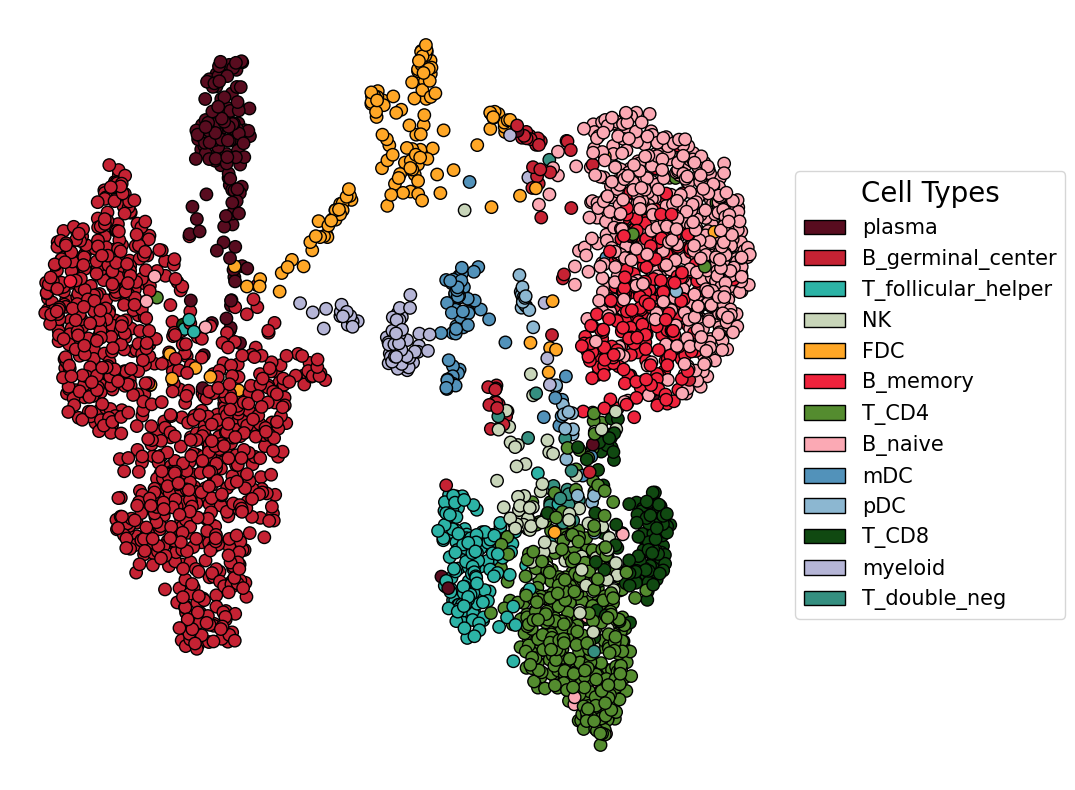

In [183]:
fig,ax = plt.subplots(1,1, figsize = (10,10))

# Create a list of legend elements
legend_elements = [Patch(facecolor=color, edgecolor='black', label=cell_type) 
                   for cell_type, color in color_assignment.items()]

ax.scatter(x_crd[rix], y_crd[rix], c = colors[rix], edgecolor = 'black', s = 80, alpha = 1)

# Add custom legend outside the plot to the right, with a larger font size
ax.legend(handles=legend_elements, title="Cell Types", loc="center left", 
          bbox_to_anchor=(1, 0.5), fontsize=15, title_fontsize=20,)

clean_axes(ax)

### Visifcation process

In [196]:
sc_x_crd = ad_sc.obsm['spatial'][:,0]
sc_y_crd = ad_sc.obsm['spatial'][:,1]

In [185]:
sp_x_crd = ad_vs.obsm['spatial'][:,0]
sp_y_crd = ad_vs.obsm['spatial'][:,1]

In [220]:
import matplotlib.patches as patches

In [ ]:
ax.set_xlim([2425,2725])
ax.set_ylim([2322,2622])

In [227]:
zoom_box = [[2425, 2322], [2725,2622]] # [(x0,y0), (x1,y1) ]
xy = zoom_box[0]
height = zoom_box[1][1] - zoom_box[0][1]
width = zoom_box[1][0] - zoom_box[0][0]

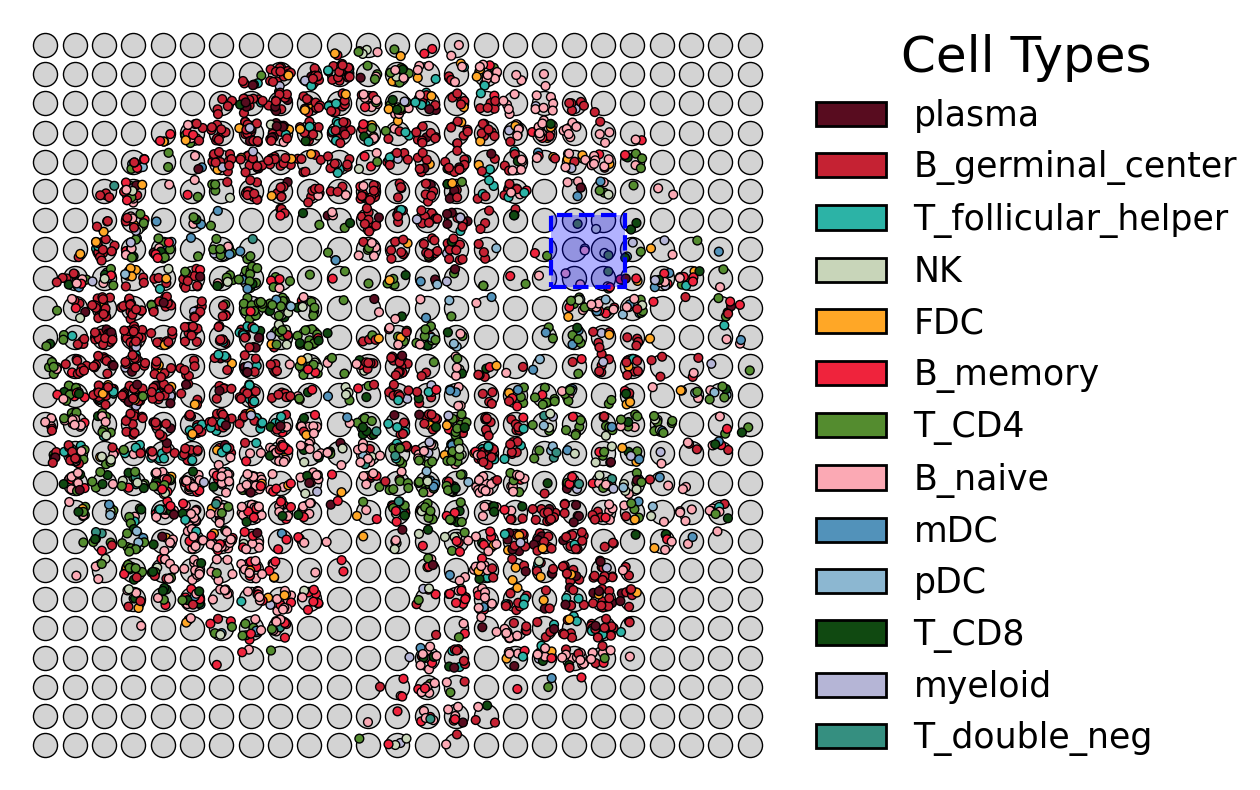

In [298]:
fig,ax = plt.subplots(1,1, figsize = (10,10))

# Create a list of legend elements
legend_elements = [Patch(facecolor=color, linewidth =2, edgecolor='black', label=cell_type) 
                   for cell_type, color in color_assignment.items()]

ax.scatter(sc_x_crd[rix], sc_y_crd[rix], c = colors[rix], edgecolor = 'black', s = 40, alpha = 1)

ax.scatter(sp_x_crd, sp_y_crd, edgecolor = 'black', s = 300, alpha = 1, zorder = -1, color = 'lightgray')

# Add custom legend outside the plot to the right, with a larger font size
ax.legend(handles=legend_elements, title="Cell Types", loc="center left", 
          bbox_to_anchor=(1, 0.5), fontsize=25, title_fontsize=36, frameon = False)

rect_f = patches.Rectangle(xy, height=height, width = width, edgecolor='none', facecolor='blue', alpha = 0.3, linestyle='--',)
rect_e = patches.Rectangle(xy, height=height, width = width, linewidth = 3, edgecolor='blue', facecolor='none', linestyle='--',)

# Add the rectangle to the axes
ax.add_patch(rect_f)
ax.add_patch(rect_e)


clean_axes(ax)

### Gene expression in visified data

In [106]:
in_tissue = ad_vs.X.sum(axis=1) != 0

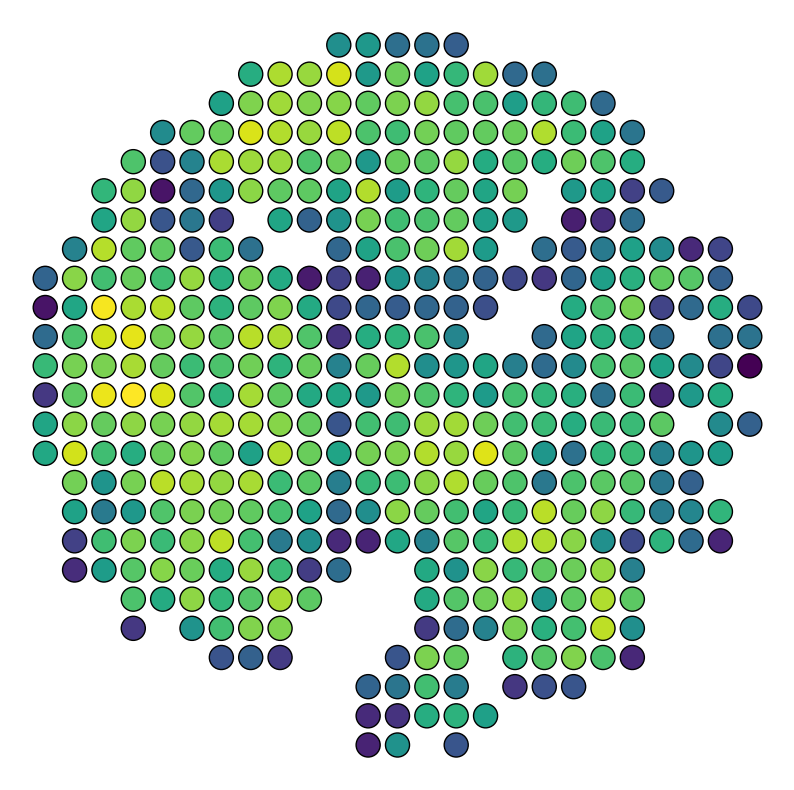

In [114]:
fig,ax = plt.subplots(1,1, figsize = (10,10))

clr = np.log1p(ad_vs.X.sum(axis=1))

ax.scatter(sp_x_crd[in_tissue], sp_y_crd[in_tissue], c = clr[in_tissue], cmap = plt.cm.viridis,s = 300, alpha = 1, zorder = -1, edgecolor = 'black')

clean_axes(ax)

### Zoom in

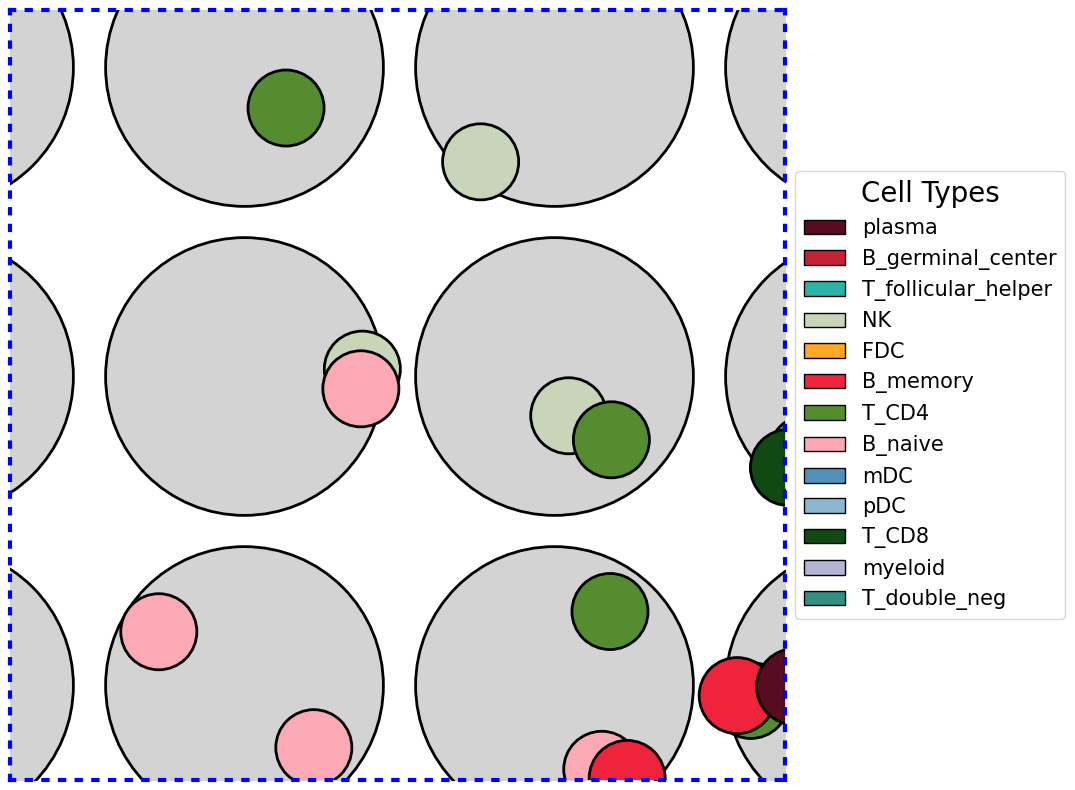

In [254]:
fig,ax = plt.subplots(1,1, figsize = (10,10))

# Create a list of legend elements
legend_elements = [Patch(facecolor=color, edgecolor='black', label=cell_type) 
                   for cell_type, color in color_assignment.items()]

ax.scatter(sc_x_crd[rix], sc_y_crd[rix], c = colors[rix], edgecolor = 'black', s = 3000, alpha = 1, linewidth = 2)

ax.scatter(sp_x_crd, sp_y_crd, edgecolor = 'black', s = 40000, alpha = 1, zorder = -1, color = 'lightgray', linewidth =2 )

# Add custom legend outside the plot to the right, with a larger font size
ax.legend(handles=legend_elements, title="Cell Types", loc="center left", 
          bbox_to_anchor=(1, 0.5), fontsize=15, title_fontsize=20,)

ax.set_xlim([zoom_box[0][0],zoom_box[1][0]])
ax.set_ylim([zoom_box[0][1],zoom_box[1][1]])

ax.set_yticks([])
ax.set_xticks([])

for spine in ax.spines.values():
    spine.set_edgecolor('blue')  # Set color to blue
    spine.set_linestyle((0,(1,3)))    # Set linestyle to dashed
    spine.set_linewidth(3)       # Set the width of the dashed line


## Results

In [285]:
delta_df = pd.read_csv(osp.join(OUTPUT_DIR, 'delta_df.csv'),index_col = 0,header = 0)
delta_df = pd.Series(delta_df.values.flatten().astype(float), index = delta_df.index)

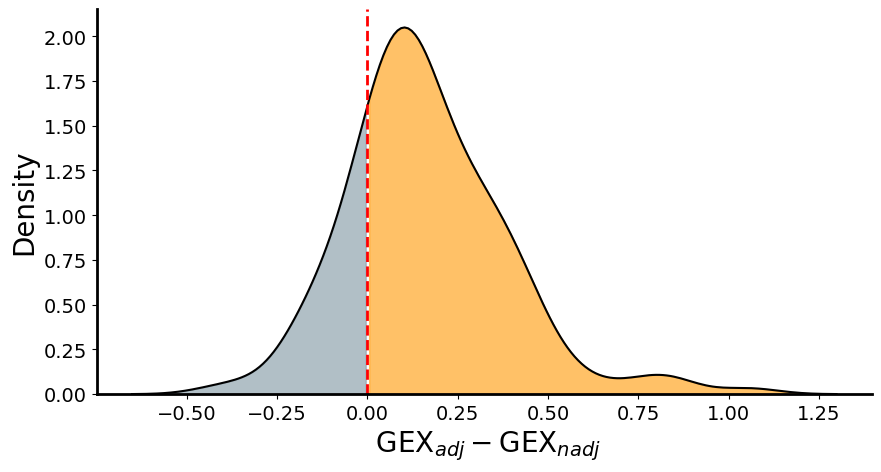

In [287]:
fig,ax = plt.subplots(1,1, figsize = (10,5))

#sns.kdeplot(delta_df)
# Generate data points for the KDE plot
x = np.linspace(min(delta_df), max(delta_df), 1000)
kde = sns.kdeplot(delta_df, color = 'black',ax = ax).get_lines()[0].get_data()
x_kde, y_kde = kde

# Fill the area under the curve to the right of x_value
ax.fill_between(x_kde, y_kde, where=(x_kde >= 0), color='#ffa726', alpha=0.7)
ax.fill_between(x_kde, y_kde, where=(x_kde < 0), color='#90a4ae', alpha=0.7)

ax.axvline(x = 0, linewidth = 2, color = 'r', linestyle = 'dashed')

ax.set_ylabel('Density', fontsize = 20)
ax.set_xlabel(r' GEX$_{adj} - $GEX$_{nadj}$', fontsize = 20) 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)


ax.tick_params(axis='x', labelsize=14, labelrotation=0, labelfontfamily = 'sans-serif')
ax.tick_params(axis='y', labelsize=14, labelfontfamily = 'sans-serif')